# 3. 시리즈 다루기 (응용)

In [1]:
import pandas as pd

In [2]:
s = pd.Series(['banana',42])

In [3]:
s

0    banana
1        42
dtype: object

In [4]:
# 인덱스 명 내 맘대로 바꾸는 방법
s = pd.Series(['Wes','pandas'],index=['Person','Who'])

In [5]:
s

Person       Wes
Who       pandas
dtype: object

In [6]:
# 데이터프레임을 만들기 위해서 딕셔너리를 DataFrame 클래스에 전달하는 방법
scientists = pd.DataFrame({
    'Name' : ['Rosaline Franklin','William Gosset'],
    'Occupation' : ['Chemist','Statistician'],
    'Born' : ['1920-07-25','1876-06-13'],
    'Died' : ['1958-04-16','1937-10-16'],
    'Age' : [37,61]}
)
print(scientists)

                Name    Occupation        Born        Died  Age
0  Rosaline Franklin       Chemist  1920-07-25  1958-04-16   37
1     William Gosset  Statistician  1876-06-13  1937-10-16   61


In [56]:
# 데이터프레임을 열 순서는 columns에 전달한 값을 따라간다.
# data는 딕셔너리에 들어갔다
# columns에서 내가 딕셔너리에 키로 넣은거 말고도 다른 키 네임을 넣어주는 방법 
scientists = pd.DataFrame(
    data={'Occupation' : ['Chemist','Statistician'],
          'Born' : ['1920-07-25','1876-06-13'],
          'Died' : ['1958-04-16','1937-10-16'],
          'Age' : [37,61]},
    # 인덱스값도 내 맘대로 수정 가능
    index=['Rosaline Franklin', 'William Gosset'],
    # 컬럼즈는 순서가 없기때문에 순서 내 맘대로 바꾸고 싶을 때 이렇게 사용한다.
    # 컬럼즈 순서 맘대로 바꿀 수 있어서 그렇다.
    columns=['Occupation', 'Born', 'Age', 'Died']
)
print(scientists)

                     Occupation        Born  Age        Died
Rosaline Franklin       Chemist  1920-07-25   37  1958-04-16
William Gosset     Statistician  1876-06-13   61  1937-10-16


- OrderedDict 방법으로도 데이터프레임 구성가능하다

- [참고 링크](https://www.daleseo.com/python-collections-ordered-dict/) 

In [8]:
# 불러올 자료의 주소, 파일명 입력
df = pd.read_csv('data/scientists.csv')

In [9]:
df.head(2)

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician


- 시리즈 메서드 정리

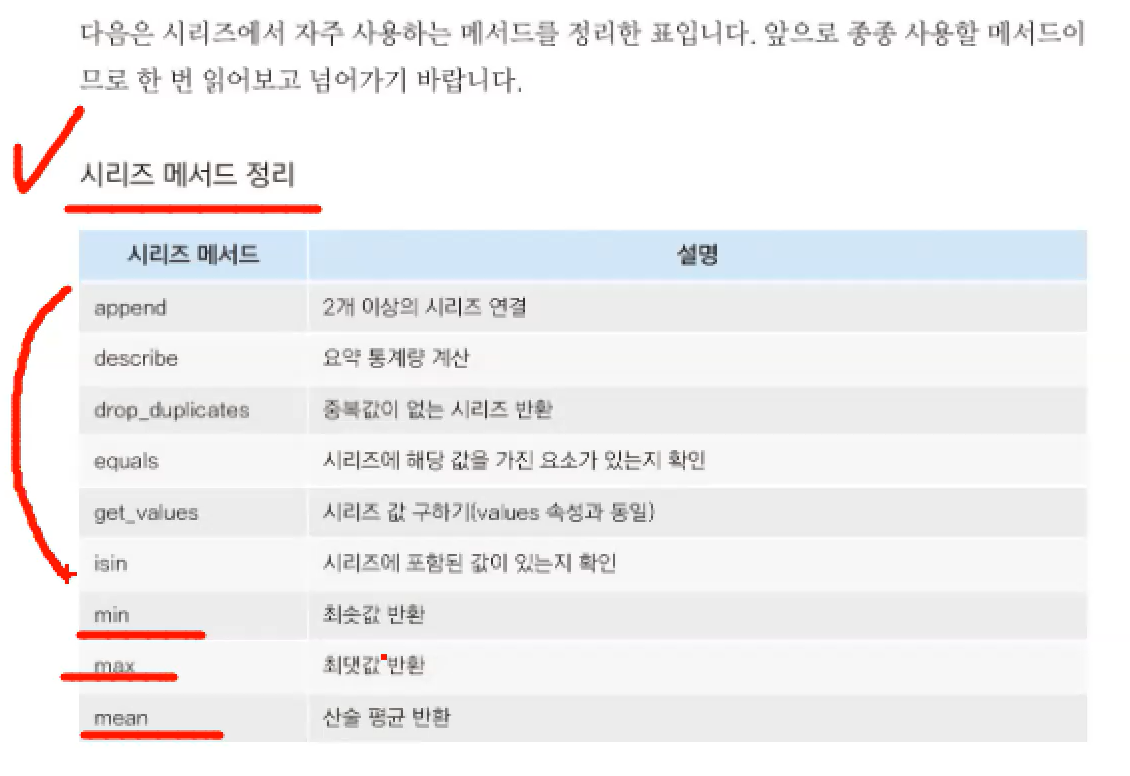

In [10]:
# 특정 칼럼만 선택해서 최대값 호출
df['Age'].max()

90

In [11]:
# 특정 컬럼에서 평균 값 이상의 값들을 불러보자
df[df['Age']>df['Age'].mean()]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [12]:
df['Age'].mean()

59.125

In [13]:
# 비교연산자 결과값 T/F
df['Age']>df['Age'].mean()

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool

In [14]:
# 조건식 임의 변수에 할당 후 호출
cond = [False,True,True,False,False,False,True,True,]

In [15]:
df[cond]
# 이렇게 조건에 따른 불린 결과 값으로 호출해서 표현하는 것도 가능하다. 

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [16]:
# 조건에 맞는 불린 값 확인
df['Occupation'] == 'Chemist'

0     True
1    False
2    False
3     True
4    False
5    False
6    False
7    False
Name: Occupation, dtype: bool

In [17]:
# 한번 더 df[]에 씌워서 조건에 맞는 값들을 호출
df[df['Occupation'] != 'Chemist']

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


## 시리즈와 브로드캐스팅
numpy에서의 브로드캐스팅이 pandas에서도 똑같이 적용된다.

In [18]:
df['Age'] + 100

0    137
1    161
2    190
3    166
4    156
5    145
6    141
7    177
Name: Age, dtype: int64

In [19]:
# pandas에서는
# 데이터 개수 매칭이 안돼서 계산이 안돼도 오류는 나지않고
# NaN 으로 처리된다.
df['Age'] + pd.Series([1,100])

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

In [20]:
# df['Age'].sort_index() 은 인덱스 값들로 정렬하겠다는 뜻
df['Age'].sort_index()

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [21]:
# 역순으로 정렬하는 방법, (ascending=True) 가 정순
df.sort_index(ascending=False)

,Name,Born,Died,Age,Occupation
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
5,John Snow,1813-03-15,1858-06-16,45,Physician
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist


In [22]:
# 칼럼 데이터의 순서대로 정렬하는 방법
# 나이가 많은 순서대로 정렬
df.sort_values(by='Age',ascending=False)
# asix=0인 기본값으로 호출 할 때는 문제가 없지만 1로 바꾸면 열 단위 데이터 정렬이 안되니까 오류남.

,Name,Born,Died,Age,Occupation
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist


### 3.5 시리즈와 데이터프레임의 데이터 처리하기

In [23]:
# 우선 데이터 타입 확인
df.info()

# 데이터 포맷이 사용하려는 형태와 다르기 때문에 포맷 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 448.0+ bytes


>포맷 관련 자료 링크
>
>[pandas 사이트 python 참고 페이지](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

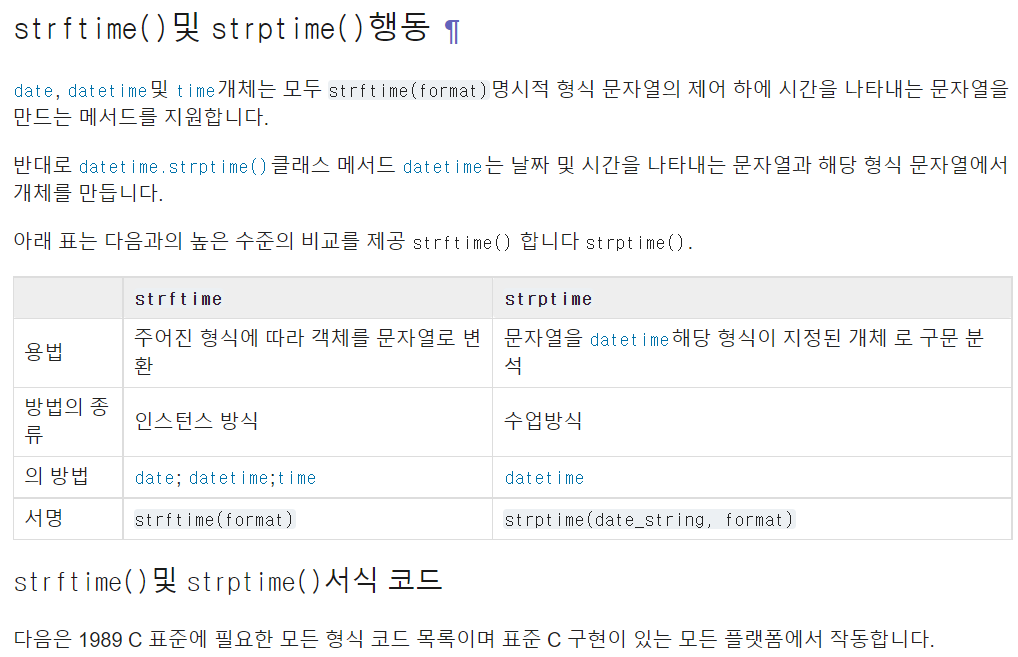
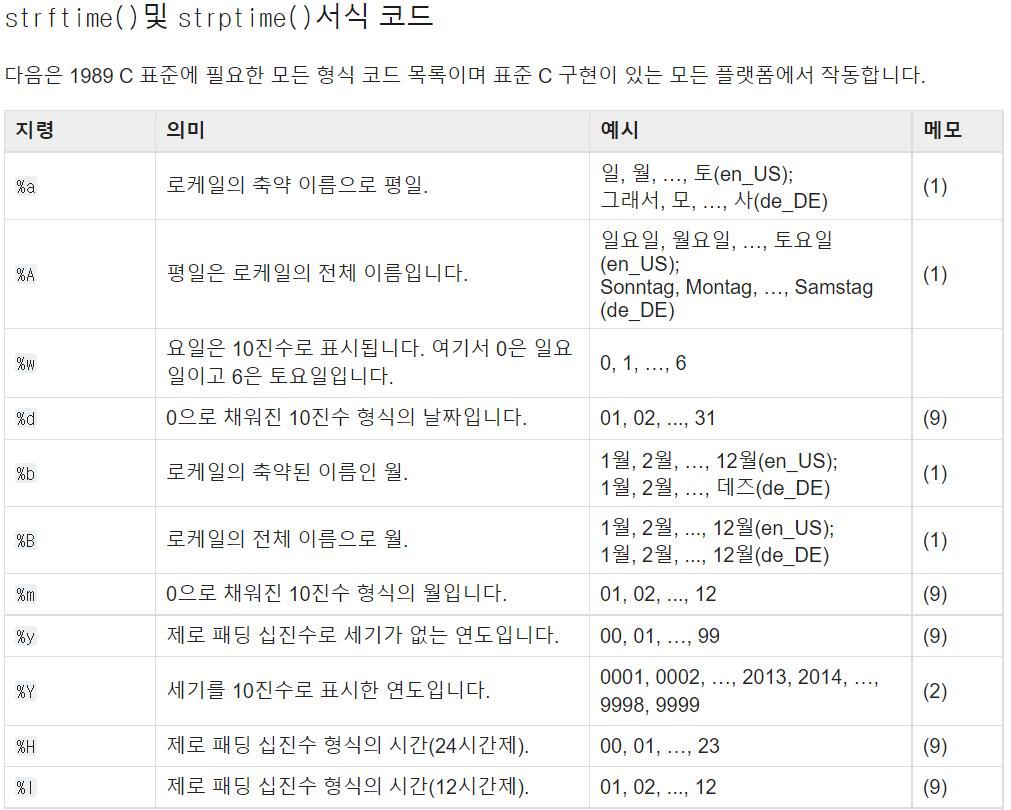
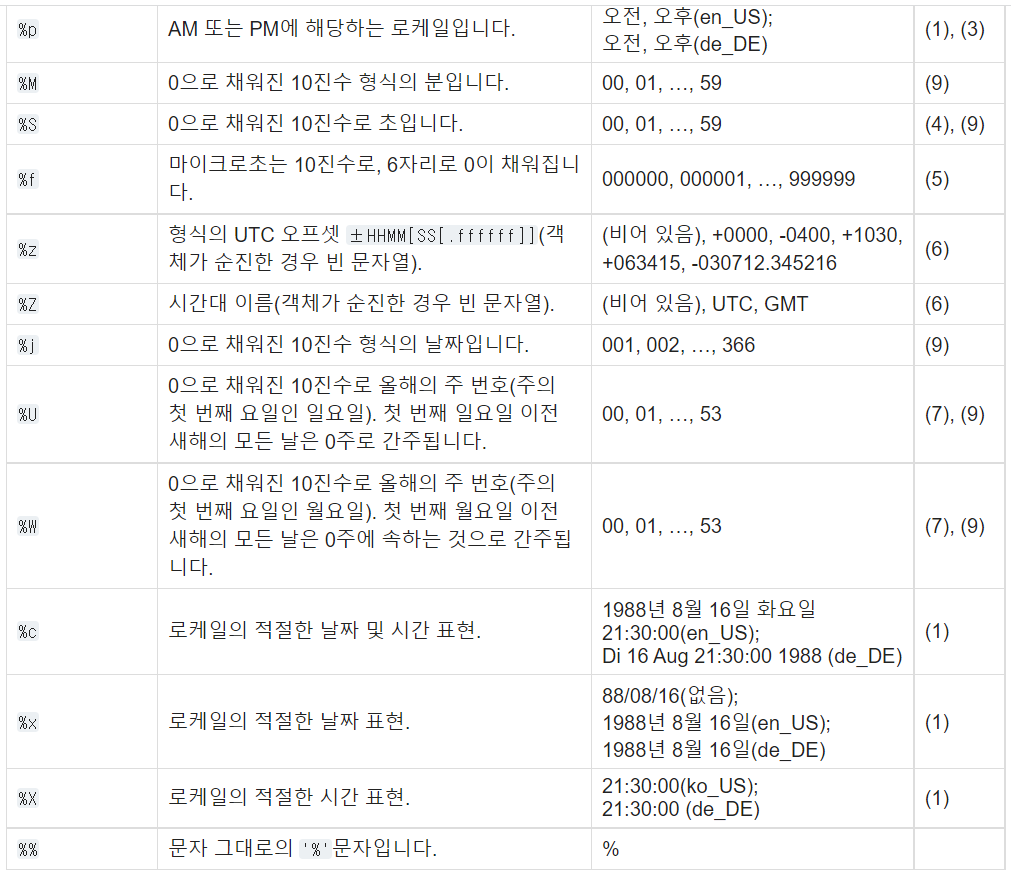
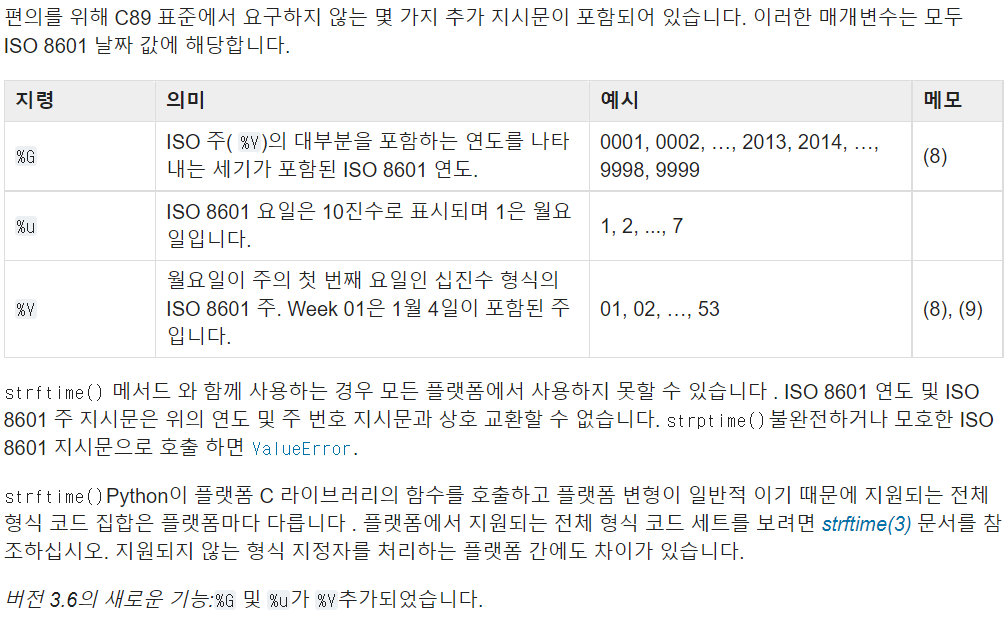

- .to_datetime() 괄호에서 S + Tab 으로 const 값 에러가 나오는 상황 정리 가능하다.

>errors : {'ignore', 'raise', 'coerce'}, default 'raise'
>
    - If :const:`'raise'`, then invalid parsing will raise an exception.
    - If :const:`'coerce'`, then invalid parsing will be set as :const:`NaT`.
    - If :const:`'ignore'`, then invalid parsing will return the input.


In [57]:
pd.to_datetime(df['Born'])

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [25]:
# 형태가 다르면 꼭 포맷 넣어주고 사용한다.
# 이렇게 두개에 저장하여 연산 ??
df['Born_dt'] = pd.to_datetime(df['Born'],format='%Y-%m-%d')
df['Died_dt'] = pd.to_datetime(df['Died'],format='%Y-%m-%d')

In [26]:
df.columns

Index(['Name', 'Born', 'Died', 'Age', 'Occupation', 'Born_dt', 'Died_dt'], dtype='object')

In [27]:
df.head(2)

,Name,Born,Died,Age,Occupation,Born_dt,Died_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16


In [28]:
# 결과가 날짜 값으로 나옴
df['Died_dt']-df['Born_dt']

0   13779 days
1   22404 days
2   32964 days
3   24345 days
4   20777 days
5   16529 days
6   15324 days
7   28422 days
dtype: timedelta64[ns]

In [29]:
import random

- 나이 값을 섞어주는 과정 실습

In [30]:
random.seed(42)

In [31]:
df['Age']

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [32]:
df

,Name,Born,Died,Age,Occupation,Born_dt,Died_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23


In [33]:
random.shuffle(df['Age'])
# 그냥 데이터 프레임 호출하면 오류남
# 특정 컬럼의 데이터 섞어줘야 함
# 근데 이거 오류는 왜 안고쳐주시지 ??

C:\Users\user\anaconda3\lib\random.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


In [34]:
df

,Name,Born,Died,Age,Occupation,Born_dt,Died_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,66,Chemist,1920-07-25,1958-04-16
1,William Gosset,1876-06-13,1937-10-16,56,Statistician,1876-06-13,1937-10-16
2,Florence Nightingale,1820-05-12,1910-08-13,41,Nurse,1820-05-12,1910-08-13
3,Marie Curie,1867-11-07,1934-07-04,77,Chemist,1867-11-07,1934-07-04
4,Rachel Carson,1907-05-27,1964-04-14,90,Biologist,1907-05-27,1964-04-14
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16
6,Alan Turing,1912-06-23,1954-06-07,37,Computer Scientist,1912-06-23,1954-06-07
7,Johann Gauss,1777-04-30,1855-02-23,61,Mathematician,1777-04-30,1855-02-23


#### 데이터프레임의 열 삭제하기

In [35]:
df.columns

Index(['Name', 'Born', 'Died', 'Age', 'Occupation', 'Born_dt', 'Died_dt'], dtype='object')

In [36]:
# index, columns 사용하는게 좋음.
# inplace=True로 적어주면 삭제한 결과값을 원본에 덮어쓰겠다고 선언해줌
# 그게 아니면 제거할 부분 제거한 결과를 새로운 df 변수 선언해서 거기에 저장해도 됨.
df.drop(columns='Age', inplace=True)

In [37]:
df

,Name,Born,Died,Occupation,Born_dt,Died_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23


### 3.6 데이터 저장하고 불러오기

#### 피클로 저장하기
데이터를 바이너리 형태로 직렬화한 오브젝트를 저장하는 방법.

데이터를 피클, CSV(,로 구분된 데이터), TSC(Tab으로 구분된 데이터) 파일로 저장하고 불러오기

#### JSON

: JSON(제이슨)은 속성-값 쌍(attribute–value pairs), 
배열 자료형(array data types) 또는 기타 모든 시리얼화 가능한 값(serializable value) 
또는 "키-값 쌍"으로 이루어진 데이터 오브젝트를 전달하기 위해 인간이 읽을 수 있는 텍스트를 사용하는(텍스트 기반의) 개방형 표준 포맷이다. 

In [38]:
df
# 위에서 작업했던 df를 저장해보자

,Name,Born,Died,Occupation,Born_dt,Died_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23


In [39]:
import pickle

In [40]:
# open은 첫번째가 파일 이름이고, 뒤에는 모드(S+Tab으로 모드 확인해볼 것)
# 쓰기모드로 할꺼니까 W 적을건데 바이트 모드니까 wb 적음

# 저장하기
f = open('data.pickle','wb')
pickle.dump(df,f)

# 파일 객체는 작업하고 close 함수 사용해주는게 좋다.
f.close()

- 저장 :
dump /
dumps
- 로드 :
load /
loads

In [41]:
# 불러오기
f = open('data.pickle','rb')
data = pickle.load(f)
f.close()

In [42]:
data

,Name,Born,Died,Occupation,Born_dt,Died_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23


- to_pickle : pandas 저장 메서드.
이건 파일을 오픈 안해줘도 사용할 수 있음.

In [43]:
# 일단 df를 json 형태로 변환 해줘야함 df.to_json 라는 자동 맞춤 메서드 사용해도 됨 하지만 아래처럼 해봄.
df['Name'].to_list()
# 시리즈 값을 넣어주고

['Rosaline Franklin',
 'William Gosset',
 'Florence Nightingale',
 'Marie Curie',
 'Rachel Carson',
 'John Snow',
 'Alan Turing',
 'Johann Gauss']

In [44]:
import json

In [45]:
# 저장하기
f = open('data.json','w')
json.dump(df['Name'].to_list(),f)

# 파일 객체는 작업하고 close 함수 사용해주는게 좋다.
f.close()

In [46]:
# 불러오기
f = open('data.json','r')
data = json.load(f)
f.close()

In [47]:
data

['Rosaline Franklin',
 'William Gosset',
 'Florence Nightingale',
 'Marie Curie',
 'Rachel Carson',
 'John Snow',
 'Alan Turing',
 'Johann Gauss']

## Excel로 저장

In [48]:
# 최근에 사용되는건 괜찮은데 예전에 사용되던 형태의 xls 파일로 저장하려면 추가로 설치해줘야 함.

In [49]:
!pip install xlwt

In [50]:
import xlwt
# 설치가 안돼서 오류

In [51]:
import openpyxl
# 설치 돼있어서 정상 진행

In [52]:
df

,Name,Born,Died,Occupation,Born_dt,Died_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23


In [53]:
df.to_excel('df_excel.xls')
# 이건 확장자 없어서 추가로 설치 하기 전엔 오류나는게 정상
# 추가로 설치해도 오류나긴 하지만 엑셀형태로 저장이 되긴 함.

C:\Users\user\AppData\Local\Temp\ipykernel_2116\1235317772.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel('df_excel.xls')


In [54]:
df.to_excel('df_excel.xlsx')
# 이건 확장자 있어서 정상 진행

In [55]:
pd.read_excel()

TypeError: read_excel() missing 1 required positional argument: 'io'

## 데이터 시각화가 필요한 이유

[정리 사이트](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=datageeks&logNo=221528927707)

> 장점
- 수치 파악을 할 때 그림으로 나타낼 수 있어서 더 명확하고 정확하게 데이터의 인사이트를 알 수 있음.

